# 선형 회귀 실습
## 최소 제곱법 (method of least squares)

In [1]:
import numpy as np

# x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# x & y mean
mx = np.mean(x)
my = np.mean(y)
print(f'mean : {mx}, {my}')

# 기울기 공식 분모 & 분자
divisor = sum([(mx - i)**2 for i in x])

def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)
    return d

dividend = top(x, mx, y, my)
print(f'분모 : {divisor}, 분자 : {dividend}')

# 기울기 & bias
a = dividend/divisor
b = my - (mx*a)

print(f'기울기 : {a}, y절편 : {b}')

mean : 5.0, 90.5
분모 : 20.0, 분자 : 46.0
기울기 : 2.3, y절편 : 79.0


## 평균 제곱 오차 (MSE, mean squared error)

In [2]:
import numpy as np

# 기울기와 y절편
fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

# MSE 함수
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

# MSE 함수를 각 y값에 대입해 최종 값을 구하는 함수
def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))
    
# predict_result
predict_result = []

# x값 대입
for i in range(len(x)):
    # predict_result 생성
    predict_result.append(predict(x[i]))
    print(f'공부한 시간 : {x[i]}, 실제 점수 : {y[i]}, 예측 점수: {predict(x[i])}')

# result MSE
print('MSE 최종값 : '+ str(mse_val(predict_result, y)))

공부한 시간 : 2, 실제 점수 : 81, 예측 점수: 82
공부한 시간 : 4, 실제 점수 : 93, 예측 점수: 88
공부한 시간 : 6, 실제 점수 : 91, 예측 점수: 94
공부한 시간 : 8, 실제 점수 : 97, 예측 점수: 100
MSE 최종값 : 11.0


## 경사 하강법

epoch = 0, 기울기 = 0.928, 절편 = 0.181
epoch = 600, 기울기 = 12.844471191318743, 절편 = 16.075105483828832
epoch = 1200, 기울기 = 10.97984864787588, 절편 = 27.202375380039047
epoch = 1800, 기울기 = 9.444955036916404, 절편 = 36.36196402234923
epoch = 2400, 기울기 = 8.181483024712653, 절편 = 43.90182464215073
epoch = 3000, 기울기 = 7.141436005020983, 절편 = 50.10838045879872
epoch = 3600, 기울기 = 6.285304810406849, 절편 = 55.21740528665834
epoch = 4200, 기울기 = 5.580566843263092, 절편 = 59.42298007931095
epoch = 4800, 기울기 = 5.000450611710807, 절편 = 62.88486565092688
epoch = 5400, 기울기 = 4.5229187377372915, 절편 = 65.73457164876129
epoch = 6000, 기울기 = 4.1298308042201395, 절편 = 68.08035232408912


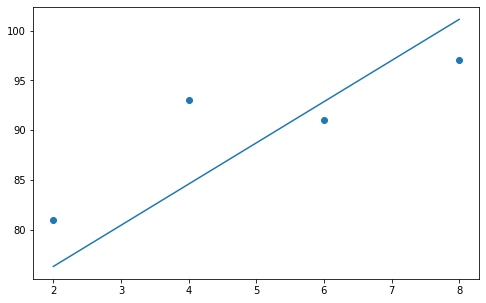

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# graph
plt.figure(figsize=(8, 5))
# plt.scatter(x, y)
# plt.show()

# x & y 넘파이 배열로 변경
x_data = np.array(x)
y_data = np.array(y)

# 기울기 & y절편 초기화
a, b = 0, 0

# learning rate
lr = 0.001

# epochs
epochs = 6001

# 경사하강법
for i in range(epochs):
    y_pred = a*x_data + b
    error = y_data - y_pred

    a_diff = -(2/len(x_data))*sum(x_data*error)
    b_diff = -(2/len(x_data))*sum(error)

    a = a - lr*a_diff
    b = b - lr*b_diff

    if i % 600 == 0:
        print(f'epoch = {i}, 기울기 = {a}, 절편 = {b}')

y_pred = a*x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

## 다중 선형 회귀
- y = a1x1 + a2x2 + b

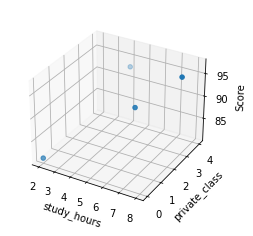

epoch = 0, a1 = 23.2000, a2 = 10.5625, b = 4.5250
epoch = 100, a1 = 6.4348, a2 = 3.9893, b = 43.9757
epoch = 200, a1 = 3.7255, a2 = 3.0541, b = 62.5766
epoch = 300, a1 = 2.5037, a2 = 2.6323, b = 70.9656
epoch = 400, a1 = 1.9527, a2 = 2.4420, b = 74.7491
epoch = 500, a1 = 1.7042, a2 = 2.3562, b = 76.4554
epoch = 600, a1 = 1.5921, a2 = 2.3175, b = 77.2250
epoch = 700, a1 = 1.5415, a2 = 2.3001, b = 77.5720
epoch = 800, a1 = 1.5187, a2 = 2.2922, b = 77.7286
epoch = 900, a1 = 1.5084, a2 = 2.2886, b = 77.7992
epoch = 1000, a1 = 1.5038, a2 = 2.2870, b = 77.8310
epoch = 1100, a1 = 1.5017, a2 = 2.2863, b = 77.8453
epoch = 1200, a1 = 1.5008, a2 = 2.2860, b = 77.8518
epoch = 1300, a1 = 1.5003, a2 = 2.2858, b = 77.8547
epoch = 1400, a1 = 1.5002, a2 = 2.2858, b = 77.8561
epoch = 1500, a1 = 1.5001, a2 = 2.2857, b = 77.8567
epoch = 1600, a1 = 1.5000, a2 = 2.2857, b = 77.8569
epoch = 1700, a1 = 1.5000, a2 = 2.2857, b = 77.8570
epoch = 1800, a1 = 1.5000, a2 = 2.2857, b = 77.8571
epoch = 1900, a1 = 1.50

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# data
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

# graph
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

# list x, y => numpy array
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# gradient
a1 = 0
a2 = 0
b = 0

# lr & epochs
lr = 0.05
epochs = 2001

# 경사하강법
for i in range(epochs):
    y_pred = a1*x1_data + a2*x2_data + b
    error = y_data - y_pred

    a1_diff = -(1/len(x1_data))*sum(x1_data*error)
    a2_diff = -(1/len(x2_data))*sum(x2_data*error)

    b_diff = -(1/len(x1_data))*sum(error)
    a1 = a1 - lr*a1_diff
    a2 = a2 - lr*a2_diff
    b = b - lr*b_diff

    if i%100 == 0:
        print('epoch = %.f, a1 = %.04f, a2 = %.04f, b = %.04f' % (i, a1, a2, b))


## 로지스틱 회귀

epoch = 0, a = -0.0500, b = -0.0250
epoch = 0, a = -0.1388, b = -0.0472
epoch = 0, a = -0.2268, b = -0.0619
epoch = 0, a = 0.1201, b = -0.0185
epoch = 0, a = 0.2374, b = -0.0068
epoch = 0, a = 0.2705, b = -0.0040
epoch = 0, a = 0.2860, b = -0.0029
epoch = 1000, a = 1.4978, b = -9.9401
epoch = 1000, a = 1.4940, b = -9.9411
epoch = 1000, a = 1.4120, b = -9.9547
epoch = 1000, a = 1.4949, b = -9.9444
epoch = 1000, a = 1.4982, b = -9.9440
epoch = 1000, a = 1.4984, b = -9.9440
epoch = 1000, a = 1.4985, b = -9.9440
epoch = 2000, a = 1.9065, b = -12.9489
epoch = 2000, a = 1.9055, b = -12.9491
epoch = 2000, a = 1.8515, b = -12.9581
epoch = 2000, a = 1.9057, b = -12.9514
epoch = 2000, a = 1.9068, b = -12.9513
epoch = 2000, a = 1.9068, b = -12.9513
epoch = 2000, a = 1.9068, b = -12.9513


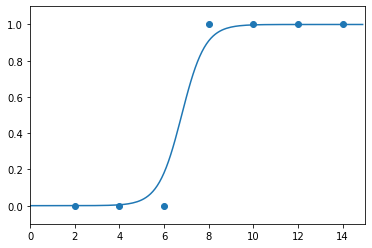

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# graph
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

# a, b 초기화
a = 0
b = 0

# lr & epochs
lr = 0.05
epochs = 2001

# sigmoid func.
def sigmoid(x):
    return 1/(1+np.e**(-x))

# 경사하강법
for i in range(epochs):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data + b) - y_data)
        b_diff = sigmoid(a*x_data + b) - y_data
        a -= lr*a_diff
        b -= lr*b_diff

        if i%1000 == 0:
            print('epoch = %.f, a = %.04f, b = %.04f' % (i, a, b))
    
# plt.scatter(x, y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()